In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train_loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train_accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation_acurracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# 하이퍼 파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [5]:
# Data loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape


((60000, 28, 28), (10000, 28, 28))

In [6]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10


In [7]:
X_train = train_image/255.
X_test = test_image/255.
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [8]:
train_label[0]


5

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [11]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [12]:
steps_per_epoch

600

## 모델의 크기 변경

In [13]:
# 작은모델 => layer층, units의 수가 적은것.
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten()) # 1차원으로 변경
    
    # Hidden layer
    model.add(keras.layers.Dense(8,activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9258 - accuracy: 0.7345 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3734 - accuracy: 0.8958 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.9092 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3009 - accuracy: 0.9160 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2872 - accuracy: 0.9193 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.9226 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2703 - accuracy: 0.9244 - va

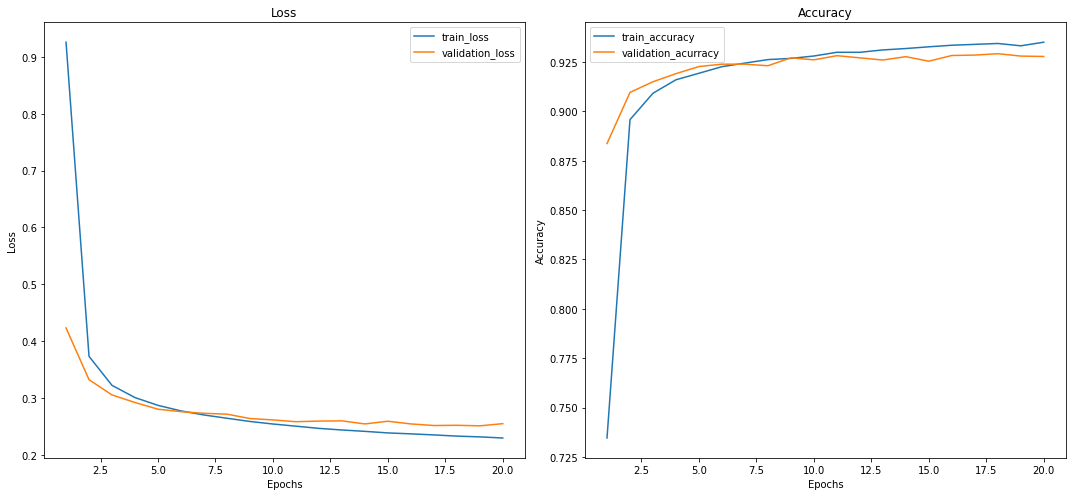

In [16]:
plot_result(history)

In [17]:
# 큰모델
# hidden layer : 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten()) # 1차원으로 변경
    
    # Hidden layer
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))

    
    
    # Output layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [18]:
model = create_model()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 583,946
Trainable params: 583,946
Non-trainable params: 0
________________________________________________

In [20]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2323 - accuracy: 0.9286 - val_loss: 0.1041 - val_accuracy: 0.9676
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9739 - val_loss: 0.0932 - val_accuracy: 0.9698
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.0841 - val_accuracy: 0.9752
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0729 - val_accuracy: 0.9781
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0837 - val_accuracy: 0.9743
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9922 - va

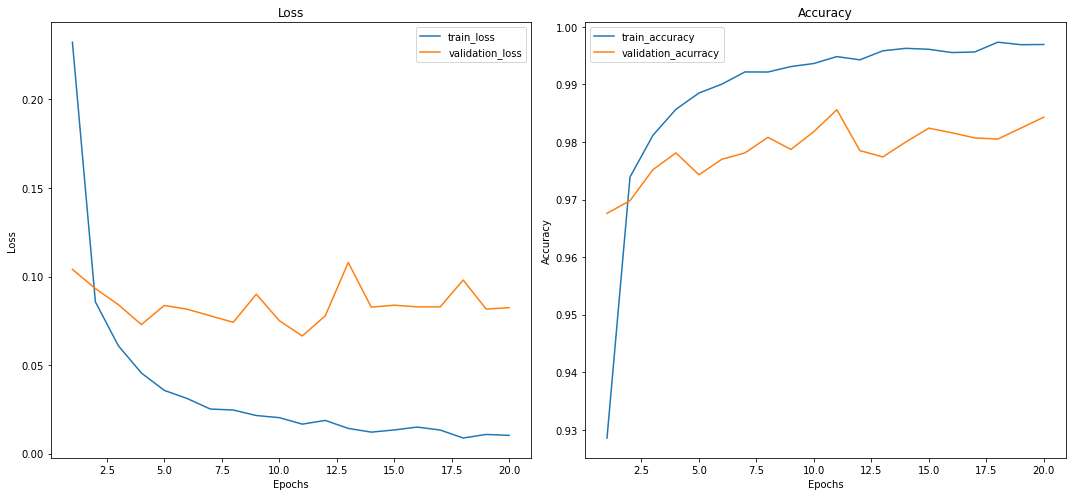

In [21]:
plot_result(history)